# GMM

In [66]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def mostrar(X, c=None, centroids=None,i=0,j=0):

    # Creamos los mapas de colores a utilizar
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FFFF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))

    # Pintamos los puntos
    plt.scatter(X.iloc[:, i], X.iloc[:, j], c=c, cmap=cmap_bold, s=60)

    # Pintamos los centroides si los hay
    # **ligero cambios con respecto a la función del notebook anterior**
    if centroids is not None:
        plt.scatter(centroids[:,i], centroids[:,j], marker='*', c=range(centroids.shape[0]), s=500)

    # Mostramos la figura
    plt.show()

!wget www.ugr.es/~isaaktriguero/data/iris.csv

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

df = pd.read_csv("iris.csv")
Y = df.iloc[:, df.columns == "class"]
df = df.drop(columns=["class"])

df_norm = (df-df.min())/(df.max()-df.min())

--2024-11-06 19:25:20--  http://www.ugr.es/~isaaktriguero/data/iris.csv
Resolving www.ugr.es (www.ugr.es)... 150.214.27.71
Connecting to www.ugr.es (www.ugr.es)|150.214.27.71|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4616 (4,5K) [text/csv]
Saving to: ‘iris.csv.3’

iris.csv.3          100%[===================>]   4,51K  --.-KB/s    in 0s      

2024-11-06 19:25:20 (580 MB/s) - ‘iris.csv.3’ saved [4616/4616]



Échale un vistazo al a [documentación](https://scikit-learn.org/1.5/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) primero

In [2]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full').fit(df_norm)
etiquetas=gmm.predict(df_norm)

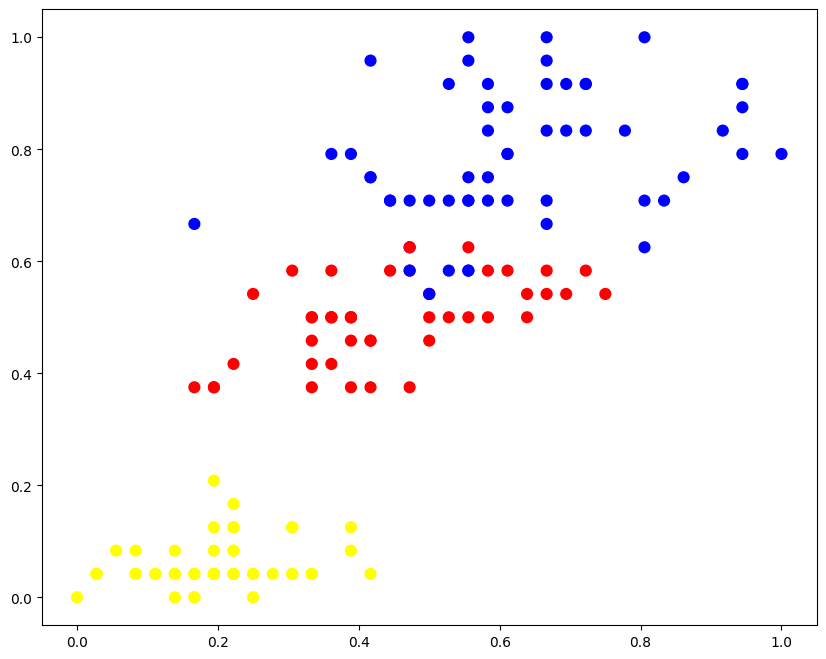

In [3]:
mostrar(df_norm, c=etiquetas, i=0,j=3)

In [4]:
probabilidades=gmm.predict_proba(df_norm)
prob=np.max(np.array(probabilidades),axis=1)

In [5]:
probabilidades

array([[6.68366845e-044, 1.00000000e+000, 7.65053154e-035],
       [6.89049931e-031, 1.00000000e+000, 3.05010674e-028],
       [7.25217353e-036, 1.00000000e+000, 4.93744706e-030],
       [1.16396570e-031, 1.00000000e+000, 3.11587935e-026],
       [2.42897143e-046, 1.00000000e+000, 3.19529898e-035],
       [6.26230962e-045, 1.00000000e+000, 3.96976878e-035],
       [6.62821192e-036, 1.00000000e+000, 7.22801389e-029],
       [4.46148445e-040, 1.00000000e+000, 7.35591361e-032],
       [1.75823971e-027, 1.00000000e+000, 3.12363281e-024],
       [1.53351852e-035, 1.00000000e+000, 1.10794381e-028],
       [2.65460089e-049, 1.00000000e+000, 7.49879455e-038],
       [1.41580158e-038, 1.00000000e+000, 3.50706084e-029],
       [9.31893762e-034, 1.00000000e+000, 2.43505516e-028],
       [3.54240002e-034, 1.00000000e+000, 8.58795336e-028],
       [2.84607980e-062, 1.00000000e+000, 4.99331065e-048],
       [1.69615116e-063, 1.00000000e+000, 1.76915641e-046],
       [3.05905801e-049, 1.00000000e+000

# Métodos Avanzados

# DBSCAN

**Tarea 1:** Implementar DBSCAN con sklearn usando Iris

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold


scan = DBSCAN()
scaler = StandardScaler()
pipe = Pipeline(
  [
    ("scaler", scaler),
    ("scan", scan)
  ]
)
param_grid={
  "scan__eps": np.linspace(0.1, 0.7, 10),
  "scan__min_samples": np.arange(3, 8)
}, 
parameters = list(ParameterGrid(param_grid))
kf = KFold(n_splits=10)
for i, (train_index, test_index) in enumerate(kf.split(df)):
  X, Xt = df.iloc[train_index, :], df.iloc[test_index, :]
  yt = Y.iloc[test_index, :]
  pipe.set_params(parameters[i])
  pred = pipe.fit_predict(X)
  sil = silhouette_score(Xt, pred)
  accu = accuracy(yt, )

  print(score)
mostrar(df_norm, c=etiquetas, i=0,j=3)

ValueError: not enough values to unpack (expected 4, got 2)

[DBSCAN sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

**Tarea 2**: Optimizar el valor de epsilon y minPts

# Hierarchical Clustering

**Tarea 3**: Aplicar Agglomerative clustering

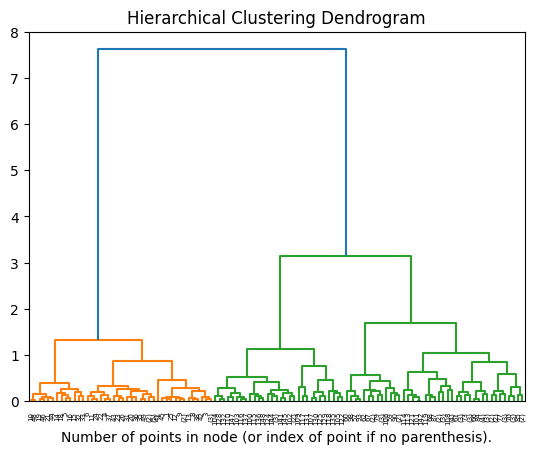

In [78]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df_norm)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=7)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

[Agglomerative clustering sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

**Tarea 4:** Plotear dendograma



[Plot Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)